<a href="https://colab.research.google.com/github/jik003/Machine-Learning_Project/blob/main/Heart_Disease_data_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import io
import seaborn as sns
import plotly.express as px

#supervised machine learning algorithm
#may use later for prediction
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

#Heart Disease Prediction
##Abstract
The goal is to accurately classify the features(except target) and predict whether patients have heart disease o

The train set includes ??? cases and the testing set includes ??? cases. 

I implement a logistic regression and try different combinations of hyperparameters using supported vector machine to get the the prediction accuracy of the features.

##Problem Statement
The purpose is to classify the features with higher accuracy. To achieve this I train the models on the chosen dataset. I want to then deploy models to learn on this data and predict the absence of heart disease.

##Dataset
I chose the dataset 'Heart Disease Dataset.csv' from kaggle. This dataset comprises of the following features: age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal3 and target. 

age = age (years)

sex = 1 is male, 0 is female

cp = chest pain type (1: atypical angina, 2: non anginal pain, 3: asymptomatic)

trestbps = resting blood pressure (in mm Hg on admission to the hospital)

chol = serum cholestoral in mg/dl

fbs = 1 is true about (fasting blood sugar > 120 mg/dl), 0 is false

restecg = resting electrocardiographic results (0: normal, 1: haing ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), 2: showing probable or definite left venticular hypertrophy by Estes' criteria)

thalach = maximum heart rate achieved

exang = 1 is yes for exercise induced angina, 0 is no

oldpeak = ST depression induced by exercise relative to rest

slope = the slope of the peak exercise ST segment (1: upsloping, 2: flat, 3: downsloping)

ca = number of major vessels (0-3) colored by flourosopy

thal = Thalium stress test result; 3 is normal; 6 is fixed defect; 7 is reversable defect

target = 1 is heart disease, 0 is absense of heart disease



#1.Feature Engineering

##Data Import

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Heart Disease Dataset.csv to Heart Disease Dataset (6).csv


In [3]:
df = pd.read_csv(io.BytesIO(uploaded['Heart Disease Dataset.csv']))

In [4]:
df
#df = df.rename(columns = {''})

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
#get data types 
print(df.shape)
df.dtypes

(303, 14)


age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

##Data Cleaning

####Outlier 1
1. df.describe() generates the summary of statistics such as minimun, maximun, mean and standard division.
2. df.describe() is able to see if there is outliers.

However, this method is only considered with the statistic table and there is no results to show the absence of outlier efficiently.

Furthermore each means seems insensitive about thier minimum and maximum values, I cannot clearly determine that there is outliers.

Therefore, data visualization process is needed for effective classification of outliers

In [6]:
#describe the summary statistics
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


####Outlier 2
I choose box plot instead of histogram to draw outliers. The plots prove that there are outliers in the following columns: trestbps, chol, thalach, oldpeak, ca, and thal.
The visulization process is necessary to distinguish the outliers which can not be found with statistic table. 
The box plots show that there is some outliers for some columns

In [7]:
fig_age = px.box(df, y='age')
fig_age.show()

In [8]:
fig_cp = px.box(df, y='cp')
fig_cp.show()

In [9]:
fig_trestbps = px.box(df, y='trestbps')
fig_trestbps.show()

In [10]:
fig_chol = px.box(df, y='chol')
fig_chol.show()

In [11]:
fig_fbs = px.box(df, y='fbs')
fig_fbs.show()

In [12]:
fig_thalach = px.box(df, y='thalach')
fig_thalach.show()

In [13]:
fig_exang = px.box(df, y='exang')
fig_exang.show()

In [14]:
fig_oldpeak = px.box(df, y='oldpeak')
fig_oldpeak.show()

In [15]:
fig_slope = px.box(df, y='slope')
fig_slope.show()

In [16]:
fig_ca = px.box(df, y='ca')
fig_ca.show()

In [17]:
fig_thal = px.box(df, y='thal')
fig_thal.show()

####Outlier 3

Look at the outliers of mutiple distribution columns in a single graph and find the solution to remove them at once.

The IQR(Inter Quartile Range) and percentiles python function are used for the dropping outliers in distribution features.

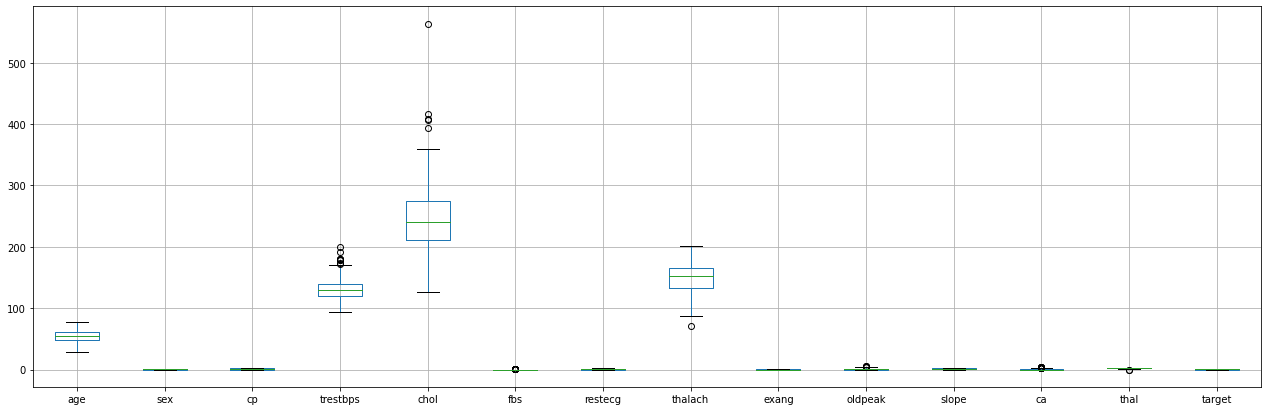

In [18]:
plt.figure(figsize = (22,7))
col = list(df.columns)
df.boxplot(col)

In [19]:
#Detecting and removing the outliers on a single column
'''
#Detecting the outliers and return them to na values on 'thal'
for x in ['thal']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan'''


'''
#Detecting the outliers on 'thal'
#IQR
Q1 = np.percentile(df['thal'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['thal'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Before dropping outliers: ", df.shape)
 
# Upper bound
upper = np.where(df['thal'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['thal'] <= (Q1-1.5*IQR))
 
#Removing the Outliers on 'thal'
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
 
print("Before dropping outliers: ", df.shape)'''

'\n#Detecting the outliers on \'thal\'\n#IQR\nQ1 = np.percentile(df[\'thal\'], 25,\n                   interpolation = \'midpoint\')\n \nQ3 = np.percentile(df[\'thal\'], 75,\n                   interpolation = \'midpoint\')\nIQR = Q3 - Q1\n \nprint("Before dropping outliers: ", df.shape)\n \n# Upper bound\nupper = np.where(df[\'thal\'] >= (Q3+1.5*IQR))\n# Lower bound\nlower = np.where(df[\'thal\'] <= (Q1-1.5*IQR))\n \n#Removing the Outliers on \'thal\'\ndf.drop(upper[0], inplace = True)\ndf.drop(lower[0], inplace = True)\n \nprint("Before dropping outliers: ", df.shape)'

In [20]:
#function outliers returns a list of index of outliers
def outliers(df, features):
    Q1 = df[features].quantile(0.25)
    Q3 = df[features].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    ls = df.index[(df[features] < lower_bound) | (df[features] > upper_bound)]

    return ls

In [21]:
df.sex.value_counts() #0 is 207, 0 is 96
df.cp.value_counts() #0 is 143, 2 is 87, 1 is 50, 3 is 23
df.fbs.value_counts() #0 is 258, 1 is 45
df.restecg.value_counts() #1 is 152, 0 is 147, 2 is 4
df.exang.value_counts() #0 is 204, 1 is 99
df.slope.value_counts() #2 is 142, 1 is 140, 0 is 21
df.ca.value_counts() #0 is 175, 1 is 65, 2 is 38, 3 is 20, 4 is 5 _ 4 is outliers
df.thal.value_counts() #2 is 166, 3 is 117, 1 is 18, 0 is 2

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

In [22]:
#empty list to store the output indices from mutiple columns for the distribution features
index_list = []
for feature in ['trestbps', 'chol', 'thalach', 'oldpeak']:
  index_list.extend(outliers(df, feature))

#print the list of index of outliers 
index_list

[8,
 101,
 110,
 203,
 223,
 241,
 248,
 260,
 266,
 28,
 85,
 96,
 220,
 246,
 272,
 101,
 204,
 221,
 250,
 291]

In [23]:
#function returns cleaned dataframe without outliers
def remove_outliers(df, ls):
  ls = sorted(set(ls))
  df = df.drop(ls)

  return df

df_cleaned = remove_outliers(df, index_list)

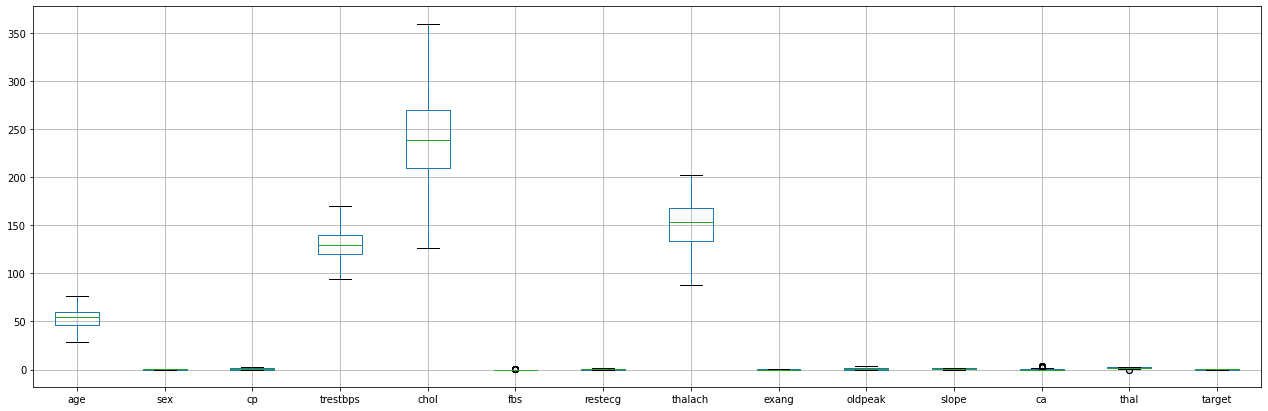

In [24]:
plt.figure(figsize = (22,7))
df_cleaned.boxplot(col)

####Dropping null values
Check if there is any null value to drop it. There is no missing value.

In [25]:
#Checking null values
df_cleaned.info()
df_cleaned.isnull().sum()
df_cleaned.count

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       284 non-null    int64  
 1   sex       284 non-null    int64  
 2   cp        284 non-null    int64  
 3   trestbps  284 non-null    int64  
 4   chol      284 non-null    int64  
 5   fbs       284 non-null    int64  
 6   restecg   284 non-null    int64  
 7   thalach   284 non-null    int64  
 8   exang     284 non-null    int64  
 9   oldpeak   284 non-null    float64
 10  slope     284 non-null    int64  
 11  ca        284 non-null    int64  
 12  thal      284 non-null    int64  
 13  target    284 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<bound method DataFrame.count of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1   

##EDA

####Expolartory Data Analysis 1 : pre-process to visulize the categorial features to apply machine learning algorithm in the future.

EDA1 provides the following visual information
1. Number of Heart Disease Patients from the dataset
2. Number of Heart Disease Patients per Gender
3. Number of Heart Disease Patients per Fasting Blood Sugar Level
4. Number of Heart Disease Patients per Exercise Induced Angina
5. Number of Heart Disease Patients per Resting Electrocardiography Results
6. Number of Heart Disease Patients per Slope of the Peak Exercise ST Segment
7. Number of Heart Disease Patients per Tthalium Stress Test Result
8. Number of Heart Disease Patients per Number of Major Vessels Coloured by Flourosopy
9. Number of Heart Disease Patients per Type of Chest Pain

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



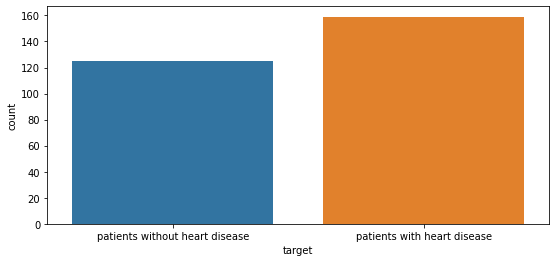

In [26]:
#count heart disease patients: df_cleaned['target'].value_counts()
plt.figure(figsize = (9, 4))
sns.countplot(df_cleaned['target'])
plt.xticks([0,1],['patients without heart disease','patients with heart disease'])
plt.show()

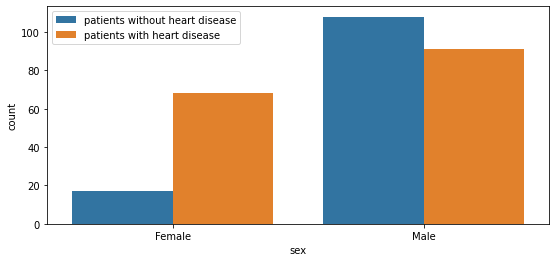

In [27]:
#count heart disease patients per each gender
plt.figure(figsize = (9, 4))
sns.countplot(x ='sex',hue = 'target',data = df_cleaned)
plt.xticks([0,1],['Female','Male'])
plt.legend(labels = ['patients without heart disease','patients with heart disease'])
plt.show()

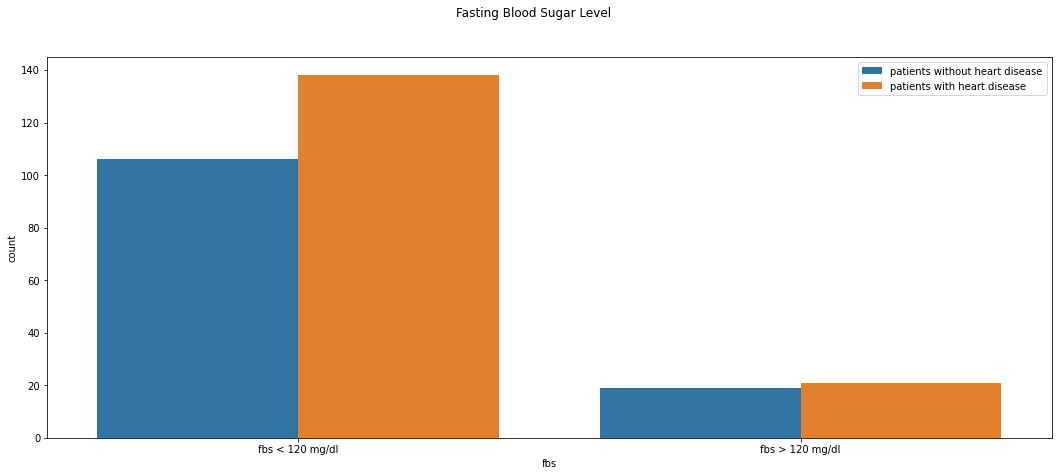

In [28]:
#count heart disease patients per fbs
plt.figure(figsize = (18,7))
plt.suptitle('Fasting Blood Sugar Level')
sns.countplot(x ='fbs',hue = 'target',data = df_cleaned)
plt.xticks([0,1],['fbs < 120 mg/dl','fbs > 120 mg/dl'])
plt.legend(labels = ['patients without heart disease','patients with heart disease'])
plt.show()

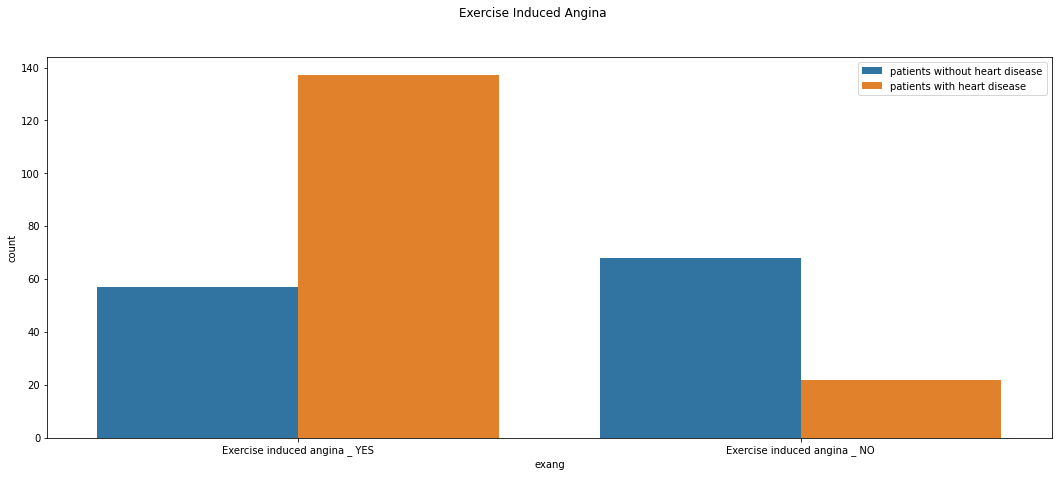

In [29]:
#count heart disease patients per exang
plt.figure(figsize = (18,7))
plt.suptitle('Exercise Induced Angina')
sns.countplot(x ='exang',hue = 'target',data = df_cleaned)
plt.xticks([0,1],['Exercise induced angina _ YES','Exercise induced angina _ NO'])
plt.legend(labels = ['patients without heart disease','patients with heart disease'])
plt.show()

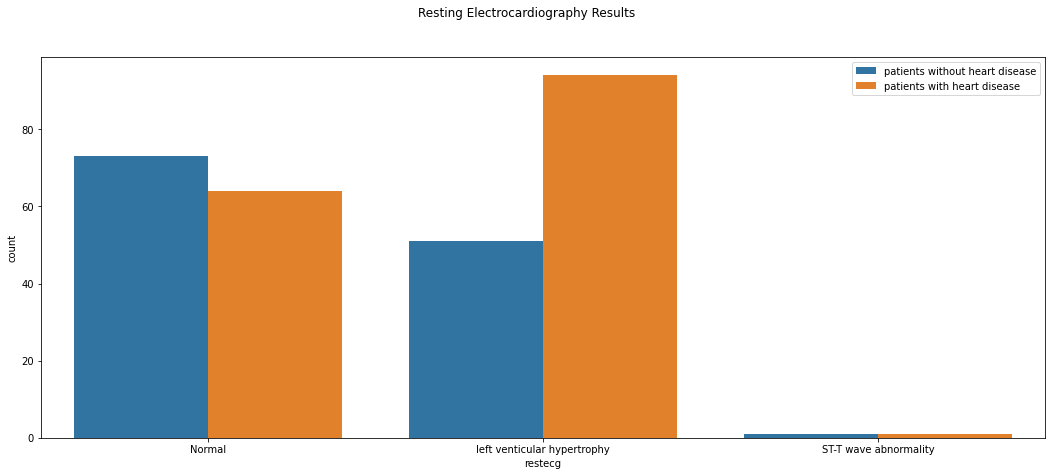

In [30]:
#count heart disease patients per restecg
plt.figure(figsize = (18,7))
plt.suptitle('Resting Electrocardiography Results')
sns.countplot(x ='restecg',hue = 'target',data = df_cleaned)
plt.xticks([0,1,2],['Normal','left venticular hypertrophy','ST-T wave abnormality'])
plt.legend(labels = ['patients without heart disease','patients with heart disease'])
plt.show()

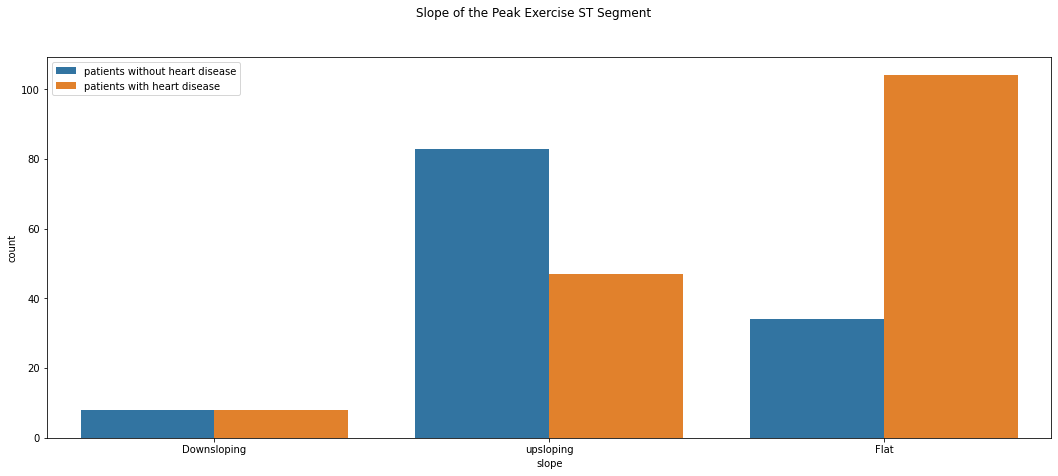

In [31]:
#find the relation between slope and target
plt.figure(figsize = (18,7))
plt.suptitle('Slope of the Peak Exercise ST Segment')
sns.countplot(x = df_cleaned['slope'], hue = df_cleaned['target'])
plt.xticks([0,1,2],['Downsloping','upsloping','Flat'])
plt.legend(labels = ['patients without heart disease','patients with heart disease'])
plt.show()

In [32]:
#drop fourth thal(outlier)
df_cleaned = df_cleaned[df_cleaned.thal != 0]

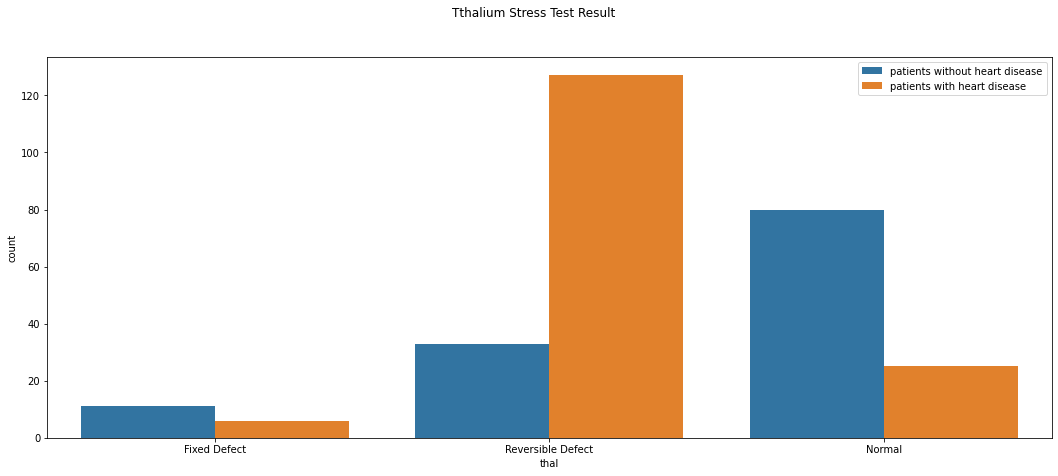

In [33]:
#count heart disease patients per the thal
plt.figure(figsize = (18,7))
plt.suptitle('Tthalium Stress Test Result')
sns.countplot(x ='thal',hue = 'target',data = df_cleaned)
plt.xticks([0,1,2],['Fixed Defect','Reversible Defect','Normal'])
plt.legend(labels = ['patients without heart disease','patients with heart disease'])
plt.show()

In [34]:
#drop fifth ca(outlier)
df_cleaned = df_cleaned[df_cleaned.ca != 4]

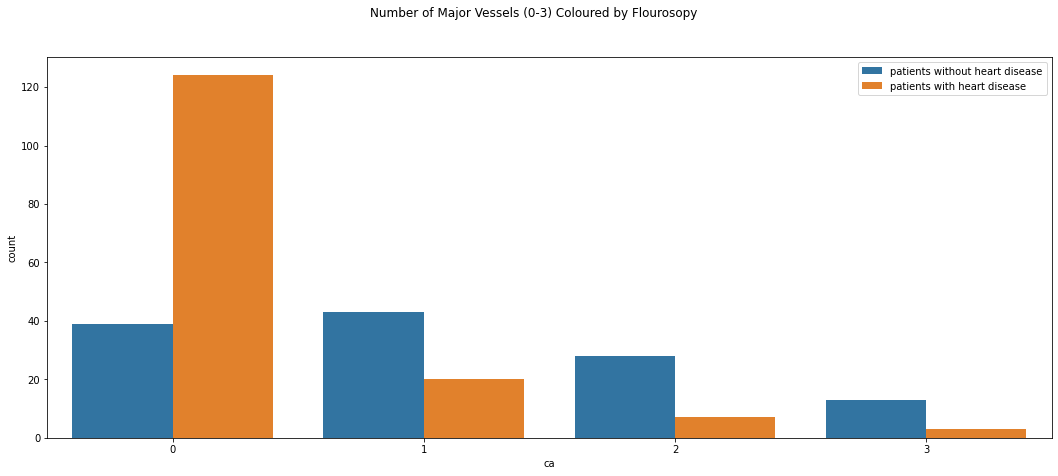

In [35]:
#count heart disease patients per the ca
plt.figure(figsize = (18,7))
plt.suptitle('Number of Major Vessels (0-3) Coloured by Flourosopy')
sns.countplot(x = df_cleaned['ca'], hue = df_cleaned['target'])
plt.xticks([0,1,2,3],[0,1,2,3])
plt.legend(labels = ['patients without heart disease','patients with heart disease'])
plt.show()

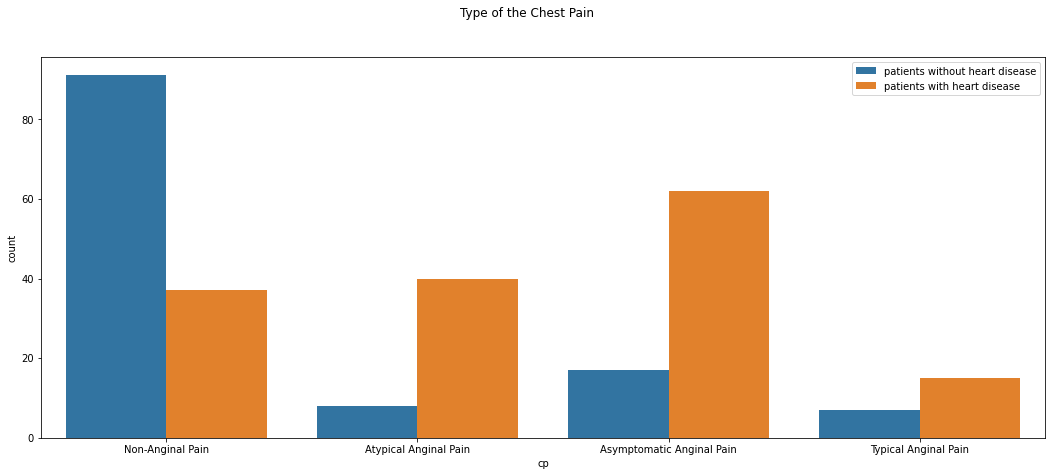

In [36]:
#count heart disease patients per the cp
plt.figure(figsize = (18,7))
plt.suptitle('Type of the Chest Pain')
sns.countplot(x ='cp',hue = 'target',data = df_cleaned)
plt.xticks([0,1,2,3],['Non-Anginal Pain','Atypical Anginal Pain','Asymptomatic Anginal Pain','Typical Anginal Pain'])
plt.legend(labels = ['patients without heart disease','patients with heart disease'])
plt.show()

####Expolartory Data Analysis 2 : pre-process to visulize the distributed features to apply machine learning algorithm in the future.

EDA2 provides the following visual information

1. Age Distribution
2. Resting Blood Pressure (mm Hg) Distribution
3. Serum Cholesterol (mg/dl) Distribution
4. Maximum Heart Rate Acheived Distribution
5. ST Depression Induced by Exercise Relative to Rest Distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Resting Blood Pressure (mm Hg) Distribution')

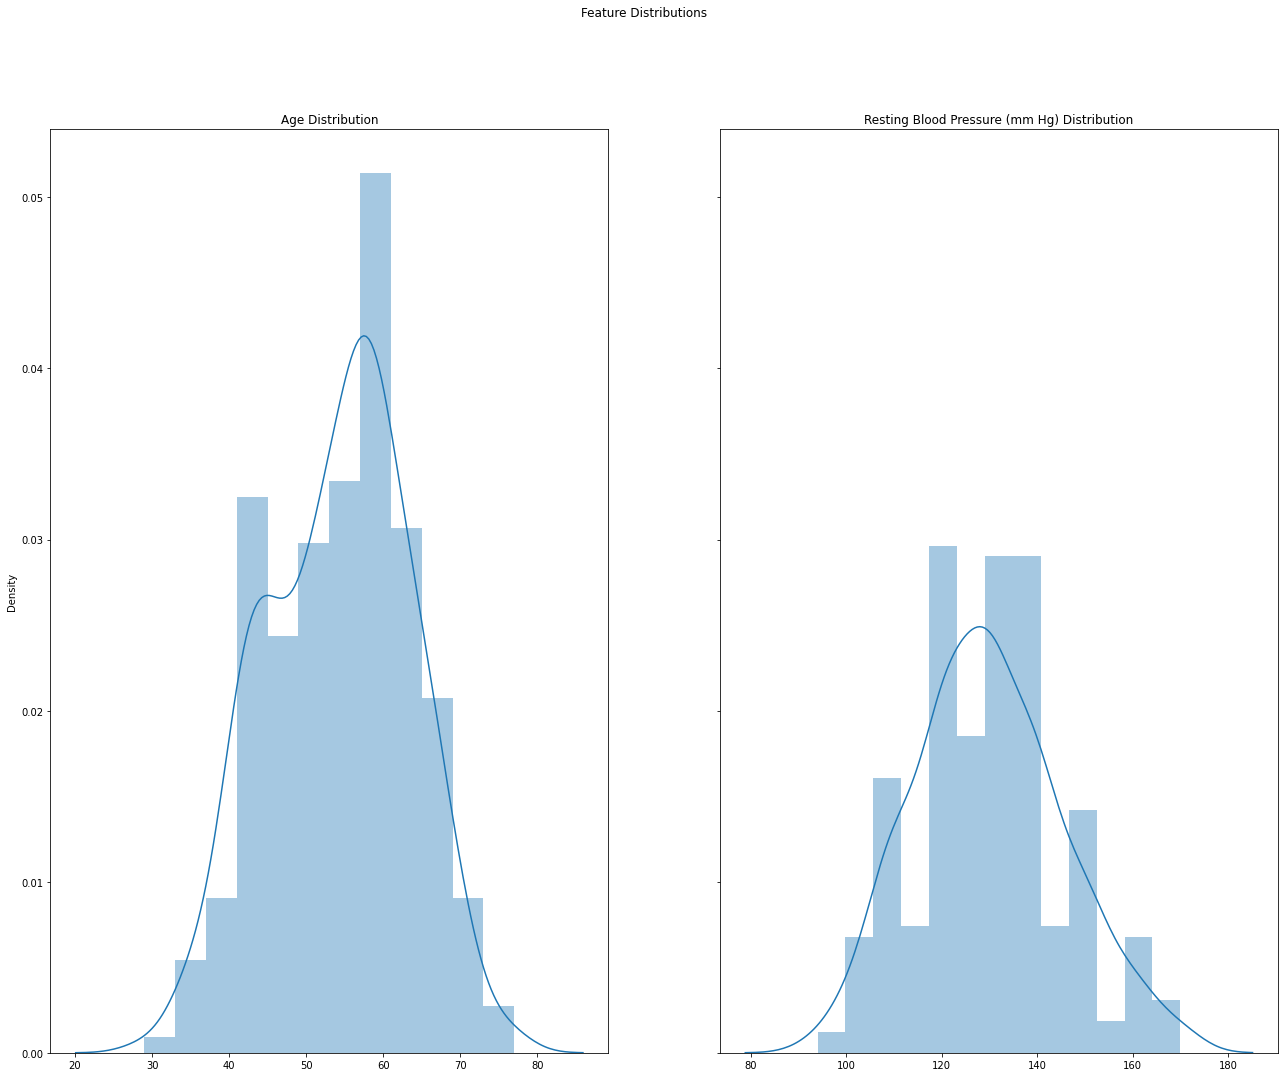

In [37]:
'''cite: Geeksforgeeks - 2 x 3 axes grid plot using subplots

figure, axes = plt.subplots(2, 3, figsize = (22,17), sharey=True)
figure.suptitle('Feature Distributions')'''

figure, axes = plt.subplots(1,2, figsize = (22,17), sharey=True)
figure.suptitle('Feature Distributions')

#age disgribution
sns.distplot(ax=axes[0], x = df_cleaned['age'])
axes[0].set_title('Age Distribution')

#trestbps distribution
sns.distplot(ax=axes[1], x = df_cleaned['trestbps'])
axes[1].set_title('Resting Blood Pressure (mm Hg) Distribution')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Maximum Heart Rate Acheived Distribution')

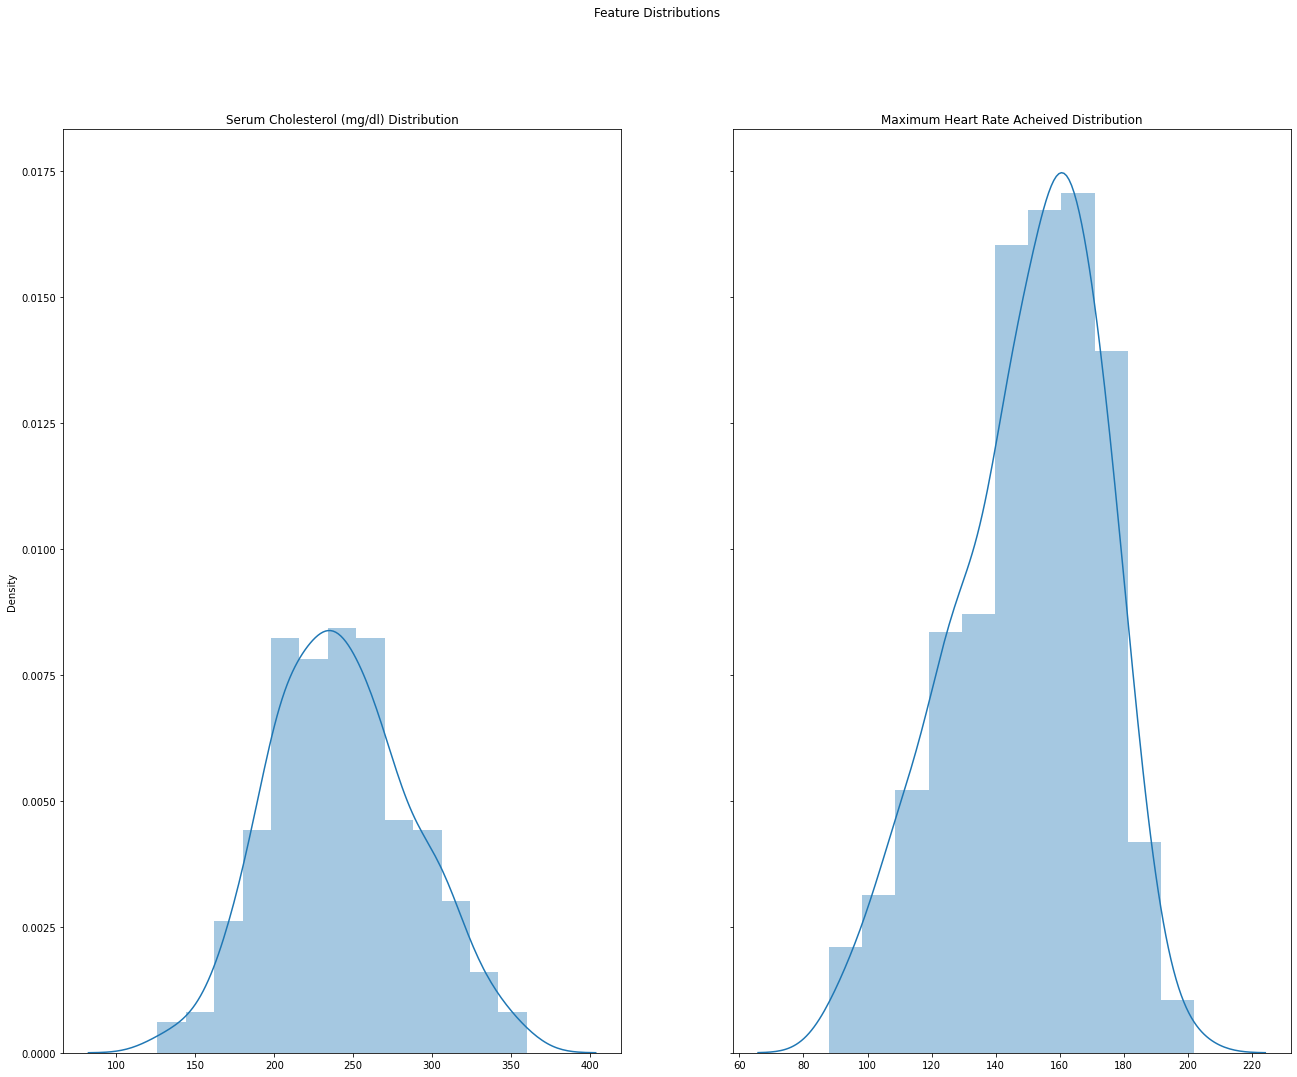

In [38]:
figure, axes = plt.subplots(1,2, figsize = (22,17), sharey=True)
figure.suptitle('Feature Distributions')

#chol distribution
sns.distplot(ax=axes[0], x = df_cleaned['chol'])
axes[0].set_title('Serum Cholesterol (mg/dl) Distribution')

#thalach distribution
sns.distplot(ax=axes[1], x = df_cleaned['thalach'])
axes[1].set_title('Maximum Heart Rate Acheived Distribution')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 0.98, 'ST Depression Induced by Exercise Relative to Rest distribution')

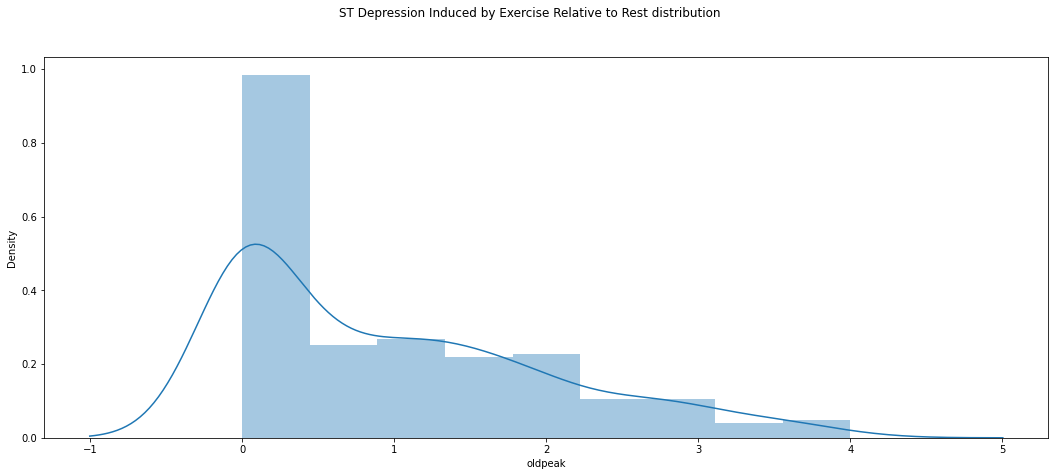

In [39]:
#oldpeak distribution
plt.figure(figsize = (18,7))
sns.distplot(df_cleaned['oldpeak'])
plt.suptitle('ST Depression Induced by Exercise Relative to Rest distribution')

####Exploratory Data Analysis 3 : pre-process to visualize the relation between the target and other features
1. Relation between target and Age
2. Relation between target and Resting Blood Pressure (mm Hg)
3. Relation between target and Serum Cholesterol (mg/dl)
4. Relation between target and Maximum Heart Rate Acheived
5. Relation between target and ST Depression Induced by Exercise Relative to Rest
6. Relation between target and Chest pain types
7. Relation between target and Resting electrocardiography results
8. Relation between target and Slope of peak exercise ST segment
9. Relation between target and No. of major vessels colored by fluoroscopy
10. Relation between target and Thalium stress test result
11. Relation between target and Gender
12. Relation between target and Fasting blood sugar
13. Relation between target and Exercise induced angina

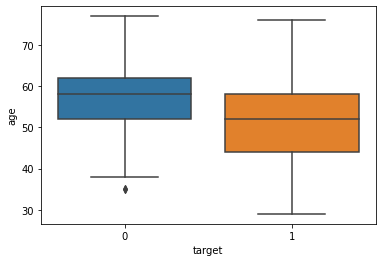

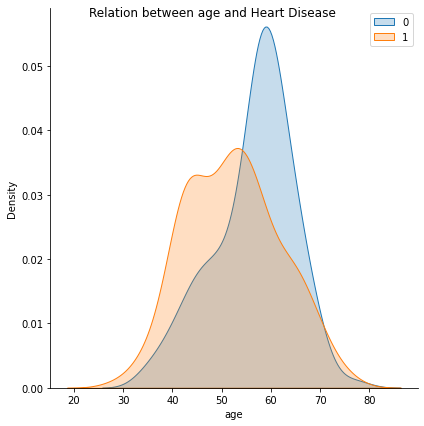

In [40]:
#FacetGrid is used to find relation between two subsets within a dataset
#compare age as per target(0 or 1)
sns.boxplot(data = df_cleaned, x = 'target', y = 'age'), 
graph = sns.FacetGrid(df_cleaned, hue = 'target', height = 6)
graph.map(sns.kdeplot, 'age', shade = True)
plt.suptitle('Relation between age and Heart Disease')
plt.legend()
plt.show()

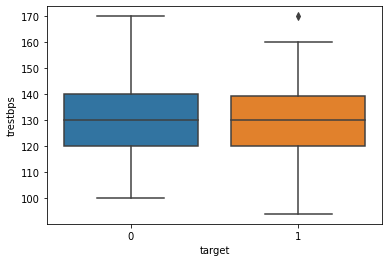

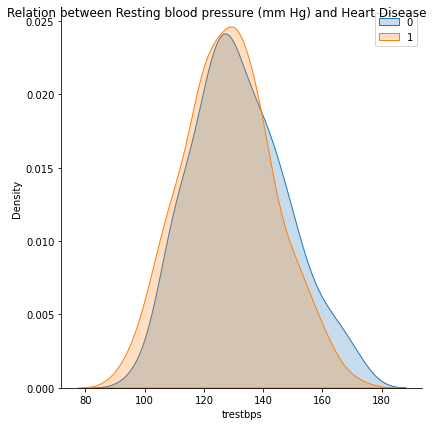

In [41]:
#compare trestbps as per target(0 or 1)
sns.boxplot(data = df_cleaned, x = 'target', y = 'trestbps'), 
graph = sns.FacetGrid(df_cleaned, hue = 'target', height = 6)
graph.map(sns.kdeplot, 'trestbps', shade = True)
plt.suptitle('Relation between Resting blood pressure (mm Hg) and Heart Disease')
plt.legend()
plt.show()

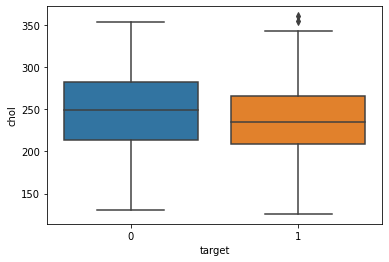

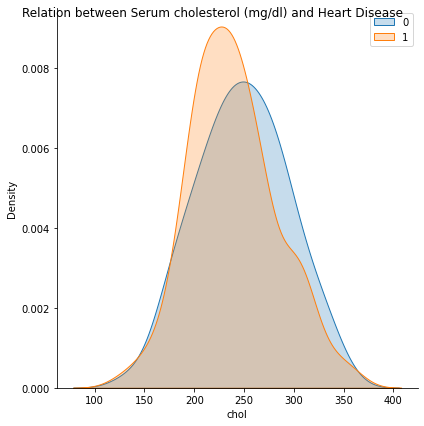

In [42]:
#compare chol as per target(0 or 1)
sns.boxplot(data = df_cleaned, x = 'target', y = 'chol'), 
graph = sns.FacetGrid(df_cleaned, hue = 'target', height = 6)
graph.map(sns.kdeplot, 'chol', shade = True)
plt.suptitle('Relation between Serum cholesterol (mg/dl) and Heart Disease')
plt.legend()
plt.show()

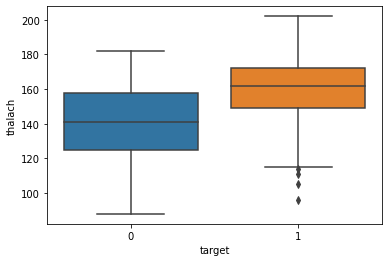

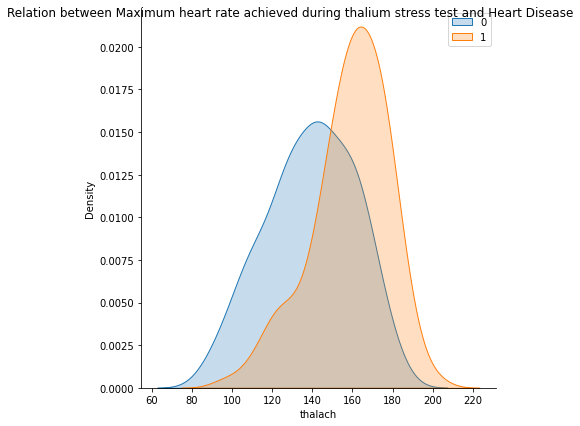

In [43]:
#compare thalach as per target(0 or 1)
sns.boxplot(data = df_cleaned, x = 'target', y = 'thalach'), 
graph = sns.FacetGrid(df_cleaned, hue = 'target', height = 6)
graph.map(sns.kdeplot, 'thalach', shade = True)
plt.suptitle('Relation between Maximum heart rate achieved during thalium stress test and Heart Disease')
plt.legend()
plt.show()

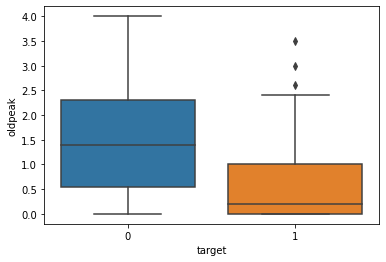

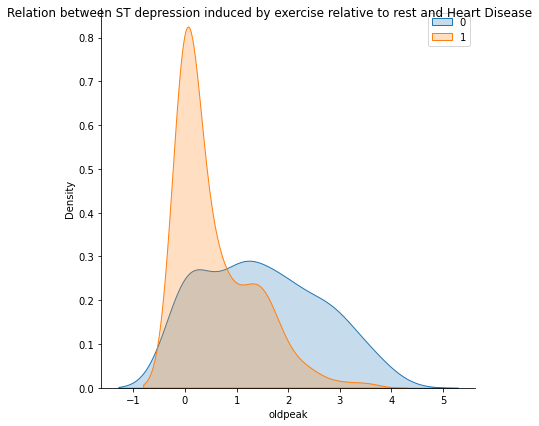

In [44]:
#compare oldpeak as per target(0 or 1)
sns.boxplot(data = df_cleaned, x = 'target', y = 'oldpeak'), 
graph = sns.FacetGrid(df_cleaned, hue = 'target', height = 6)
graph.map(sns.kdeplot, 'oldpeak', shade = True)
plt.suptitle('Relation between ST depression induced by exercise relative to rest and Heart Disease')
plt.legend()
plt.show()

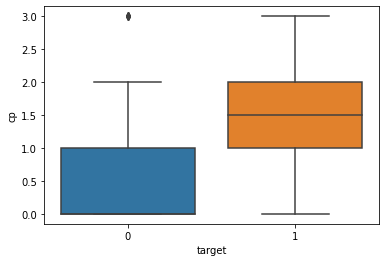

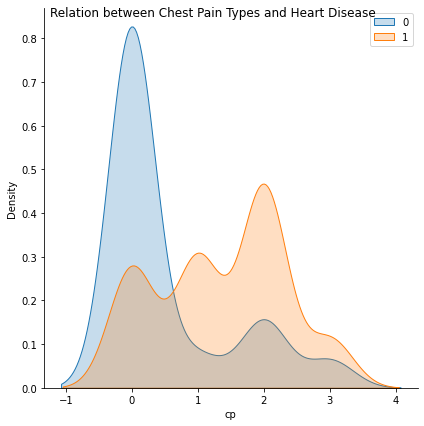

In [45]:
#compare cp as per target(0 or 1)
sns.boxplot(data = df_cleaned, x = 'target', y = 'cp'), 
graph = sns.FacetGrid(df_cleaned, hue = 'target', height = 6)
graph.map(sns.kdeplot, 'cp', shade = True)
plt.suptitle('Relation between Chest Pain Types and Heart Disease')
plt.legend()
plt.show()

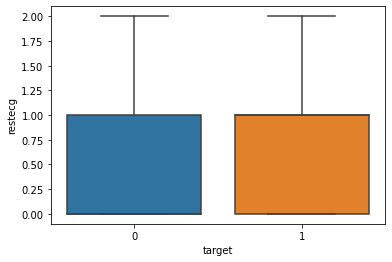

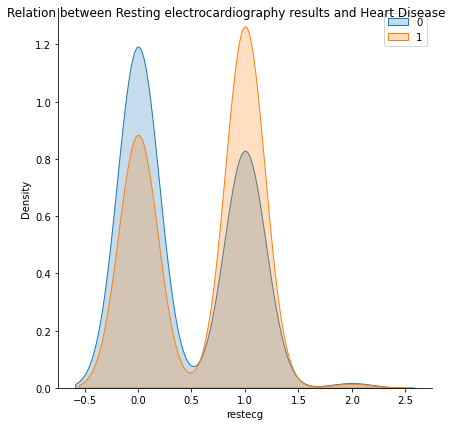

In [46]:
#compare restecg as per target(0 or 1)
sns.boxplot(data = df_cleaned, x = 'target', y = 'restecg'), 
graph = sns.FacetGrid(df_cleaned, hue = 'target', height = 6)
graph.map(sns.kdeplot, 'restecg', shade = True)
plt.suptitle('Relation between Resting electrocardiography results and Heart Disease')
plt.legend()
plt.show()

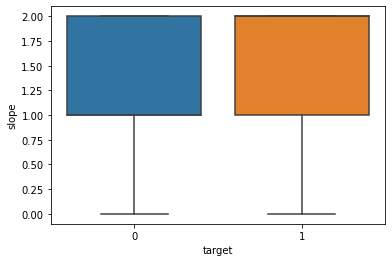

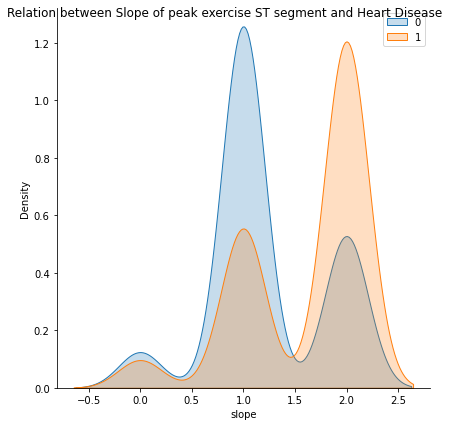

In [47]:
#compare slope as per target(0 or 1)
sns.boxplot(data = df_cleaned, x = 'target', y = 'slope'), 
graph = sns.FacetGrid(df_cleaned, hue = 'target', height = 6)
graph.map(sns.kdeplot, 'slope', shade = True)
plt.suptitle('Relation between Slope of peak exercise ST segment and Heart Disease')
plt.legend()
plt.show()

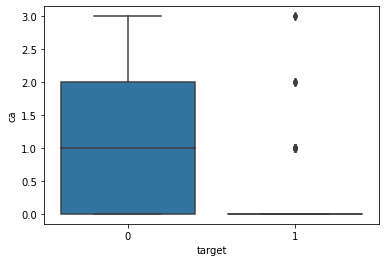

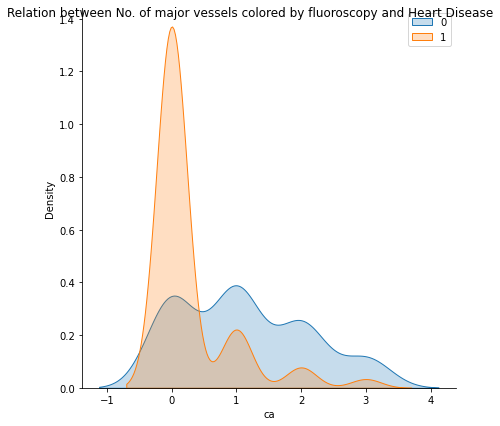

In [48]:
#compare ca as per target(0 or 1)
sns.boxplot(data = df_cleaned, x = 'target', y = 'ca'), 
graph = sns.FacetGrid(df_cleaned, hue = 'target', height = 6)
graph.map(sns.kdeplot, 'ca', shade = True)
plt.suptitle('Relation between No. of major vessels colored by fluoroscopy and Heart Disease')
plt.legend()
plt.show()

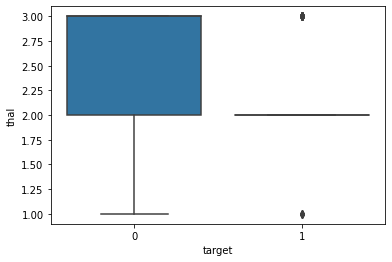

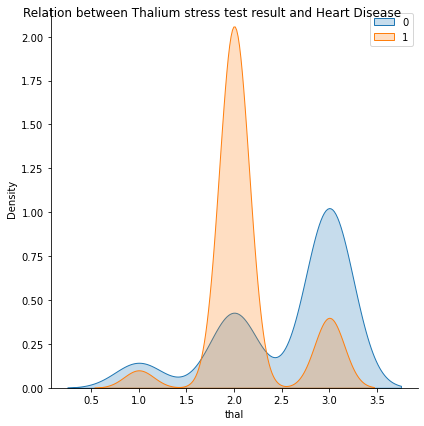

In [49]:
#compare thal as per target(0 or 1)
sns.boxplot(data = df_cleaned, x = 'target', y = 'thal'), 
graph = sns.FacetGrid(df_cleaned, hue = 'target', height = 6)
graph.map(sns.kdeplot, 'thal', shade = True)
plt.suptitle('Relation between Thalium stress test result and Heart Disease')
plt.legend()
plt.show()

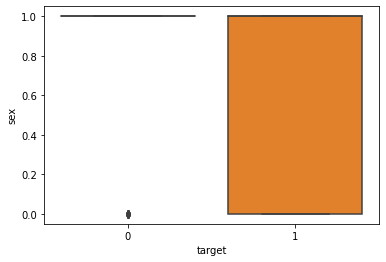

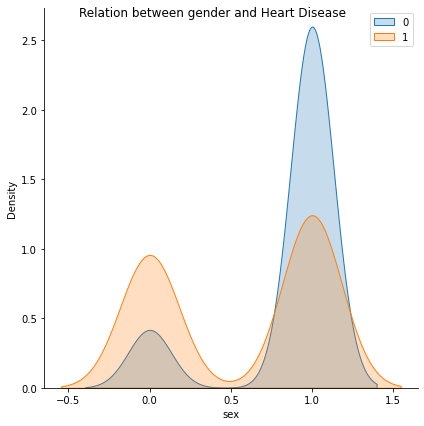

In [50]:
#compare sex as per target(0 or 1)
sns.boxplot(data = df_cleaned, x = 'target', y = 'sex'), 
graph = sns.FacetGrid(df_cleaned, hue = 'target', height = 6)
graph.map(sns.kdeplot, 'sex', shade = True)
plt.suptitle('Relation between gender and Heart Disease')
plt.legend()
plt.show()

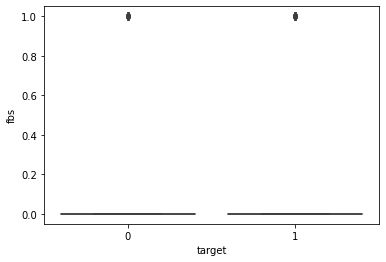

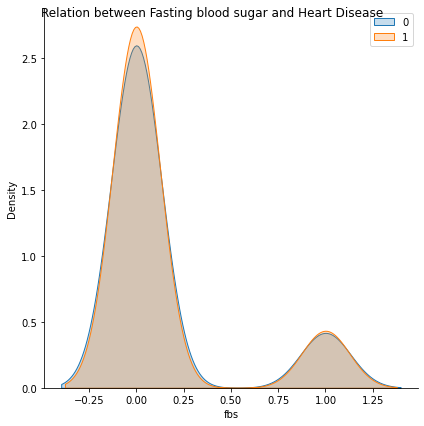

In [51]:
#compare fbs as per target(0 or 1)
sns.boxplot(data = df_cleaned, x = 'target', y = 'fbs'), 
graph = sns.FacetGrid(df_cleaned, hue = 'target', height = 6)
graph.map(sns.kdeplot, 'fbs', shade = True)
plt.suptitle('Relation between Fasting blood sugar and Heart Disease')
plt.legend()
plt.show()

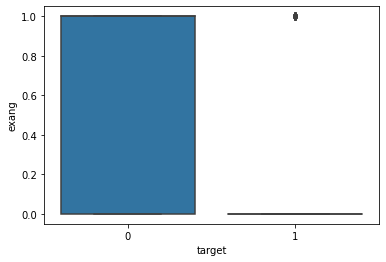

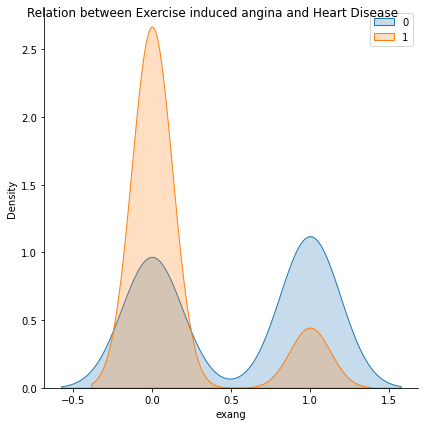

In [52]:
#compare exang as per target(0 or 1)
sns.boxplot(data = df_cleaned, x = 'target', y = 'exang'), 
graph = sns.FacetGrid(df_cleaned, hue = 'target', height = 6)
graph.map(sns.kdeplot, 'exang', shade = True)
plt.suptitle('Relation between Exercise induced angina and Heart Disease')
plt.legend()
plt.show()

####Visulazing Statistics / Heatmap
Find the correlation of target and other features.

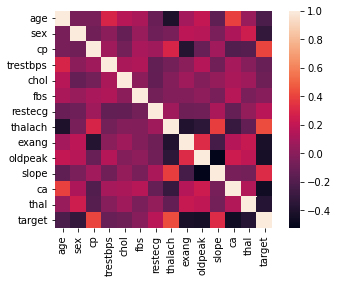

In [53]:
#Heatmap visulisation for each attribute coefficient correlation
correlation = df_cleaned.corr()
sns.heatmap(correlation, square=True)

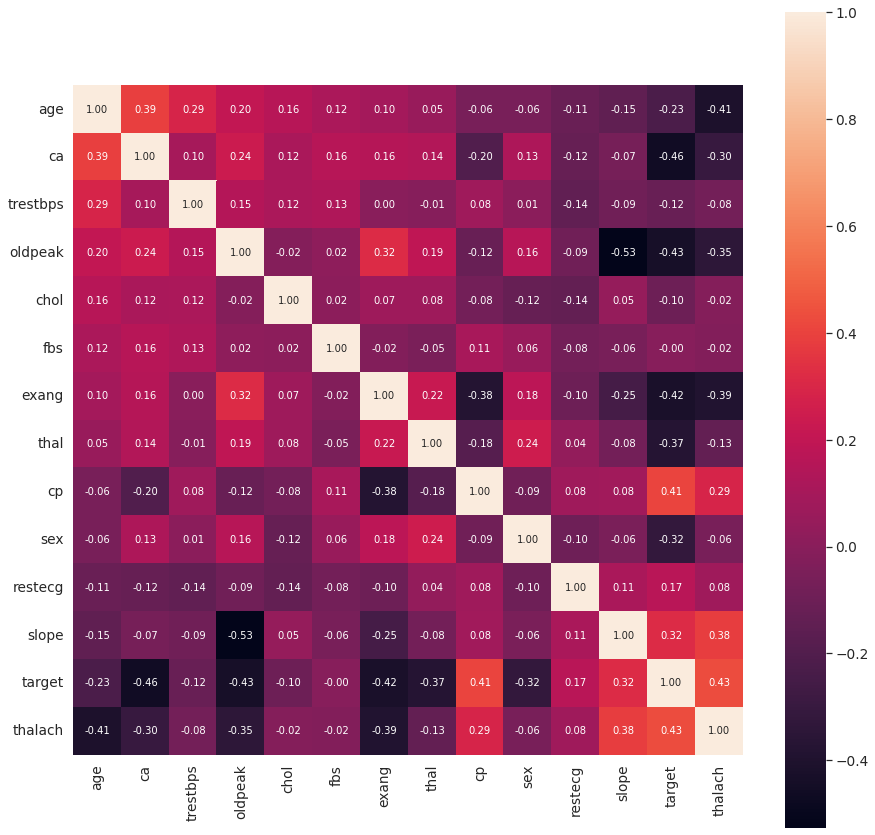

In [54]:
#number of features that are viewed in heat map
plt.figure(figsize = (15, 15))
#every columns are drawn in heat map
k=14

#find the columns which related to output attribute
#arrange from top coefficient correlation value to downwards
cols=correlation.nlargest(k,'age')['age'].index

#correlation coefficient values
coff_values=np.corrcoef(df_cleaned[cols].values.T)

#describe the heatmap of correlation coefficient values
sns.set(font_scale=1.25)
sns.heatmap(coff_values, cbar = True, annot = True, square = True, fmt = '.2f', annot_kws = {'size': 10}, yticklabels = cols.values, xticklabels = cols.values)

In [55]:
#correlation coefficient values in each attributes
correlation_values=df_cleaned.corr()['target']
correlation_values.abs().sort_values(ascending=False)

target      1.000000
ca          0.460788
oldpeak     0.433860
thalach     0.429876
exang       0.420182
cp          0.406872
thal        0.373235
sex         0.320876
slope       0.319642
age         0.227089
restecg     0.168862
trestbps    0.118852
chol        0.100728
fbs         0.002668
Name: target, dtype: float64